In [ ]:
!pip install keras


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 6s 21ms/step - loss: 0.2772 - val_loss: 0.1908
Epoch 2/50
235/235 [==============================] - 6s 23ms/step - loss: 0.1712 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1437 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1282 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1115 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1026 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0998 - val_loss: 0.0976
Epoch 10/50
235/235 [=====

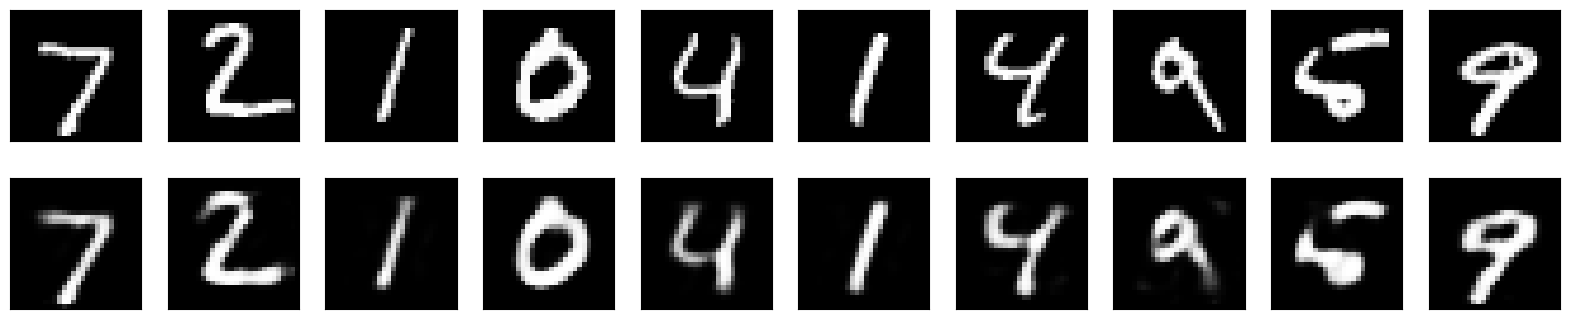

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the dimensions of the encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Define the input placeholder
input_img = Input(shape=(784,))

# Define the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoded representation of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Create a separate decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Plot the original and reconstructed images
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
